# Impotes

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Import Classification Set

In [2]:
from sklearn.datasets import make_classification

In [5]:
features,target=make_classification(n_samples=20,n_features=2,n_informative=1,n_redundant=0,n_clusters_per_class=1,random_state=1)

In [6]:
features

array([[-0.88762896,  0.78495941],
       [-0.0126646 ,  1.14170405],
       [-0.19183555,  0.98442445],
       [-0.26788808, -0.33042111],
       [-0.93576943, -1.88322521],
       [ 0.2344157 ,  1.40582549],
       [ 0.53035547, -1.29211637],
       [-0.12289023, -0.66789616],
       [-0.84520564,  1.76012752],
       [ 1.65980218,  1.06362062],
       [-0.68372786, -1.41175625],
       [ 0.90085595, -1.20268814],
       [-0.69166075, -0.8775674 ],
       [-0.39675353, -1.09569694],
       [ 0.74204416,  1.32390231],
       [-1.11731035,  0.58167452],
       [ 0.50249434, -1.23476411],
       [-0.67124613,  1.11896187],
       [ 0.90159072, -0.3766506 ],
       [-0.6871727 ,  0.46052788]])

In [7]:
target

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [8]:
df=pd.DataFrame(data=features,columns=['Fist Col','Second Col'])

In [9]:
df['target']=target

In [10]:
df.head()

,Fist Col,Second Col,target
0,-0.887629,0.784959,1
1,-0.012665,1.141704,1
2,-0.191836,0.984424,1
3,-0.267888,-0.330421,0
4,-0.935769,-1.883225,0


In [12]:
features.shape

(20, 2)

In [13]:
target.shape

(20,)

In [14]:
np.bincount(target)

array([10, 10])

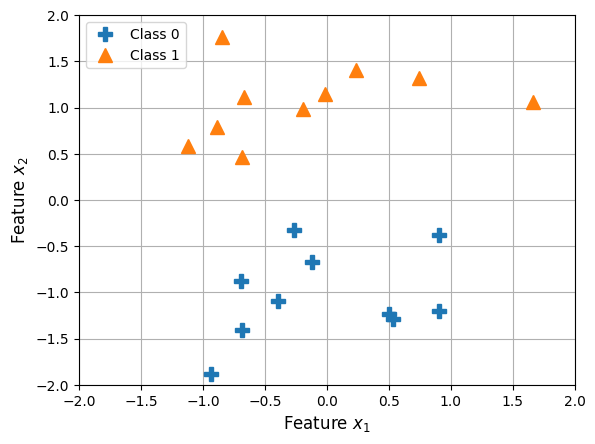

In [19]:
plt.plot(
    features[target==0, 0],
    features[target==0, 1],
    marker='P',
    markersize=10,
    linestyle=' ',
    label='Class 0'
)

plt.plot(
    features[target==1,0],
    features[target==1,1],
    marker='^',
    markersize=10,
    linestyle='',
    label='Class 1'
)

plt.legend(loc=2)

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.xlabel("Feature $x_1$",fontsize=12)
plt.ylabel("Feature $x_2$",fontsize=12)

plt.grid()
plt.show()

# Now The Perpration Of Data is Done

In [38]:
class Perceptron:

  # initial setup
  def __init__(self,num_features):
    self.num_features=num_features
    #self.weights=[0.0 for _ in range(num_features)]
    # coefficient
    self.weights=[0.0]* num_features
    self.bias=0

  def forward(self,x):
    weighted_sum=self.bias
    for i,_ in enumerate(self.weights):
      weighted_sum+=x[i]*self.weights[i]


    if weighted_sum>0:
      prediction=1
    else:
      prediction=0

    return prediction
  def update(self,x,y):
    prediction=self.forward(x)
    error=y-prediction

    # updation the weights

    self.bias+=error

    for i,_ in enumerate(self.weights):
      self.weights[i]+=error*x[i]

    return error

In [ ]:
def train(model,X_train,Y_train,epochs):
    for epoch in range(epochs):
        error_count=0
        for x,y in zip(X_train,Y_train):
            error=model.update(x,y)
            error_count+=abs(error)
            print(f"Epoch {epoch+1} erros {error_count}")

In [39]:
def compute_accuracy(model,features,targets):
    correct=0.0

    for x,y in zip(features,targets):
        prediction=model.forward(x)
        correct+=int(prediction==y)
    return correct/len(targets)

In [ ]:
def get_ploat_boundarys(model):
    w1,w2=model.weights[0],model.weights[1]
    b=model.bias

    x1_min=-20
    x2_min=(-(w1*x1_min)-b)/w2

    x1_max=20
    x2_max=(-(w1*x1_max)-b)/w2

    return x1_min,x1_max,x2_min,x2_max

In [40]:
def ploat_boundary(model):

    x1_min,x1_max,x2_min,x2_max=get_ploat_boundarys(model)

    plt.ploat(
        features[targets==0,0],
        features[targets==0,1],
        marker="D",
        markersize=10,
        linestyle="",
        label="Class 0"
    )

    plt.ploat(
        features[targets==1,0],
        features[targets==1,1],
        marker="^",
        markersize=10,
        linestyle="",
        label="Class 1"
    )

    plt.ploat([x1_min,x1_max],[x2_min,x2_max],color="k")

    plt.legend(loc=2)

    plt.xlim([-2,2])
    plt.ylim([-2,2])

    plt.xlabel("Feature $x_1$",fontsize=12)
    plt.ylabel("Feature $x_2$",fontsize=12)

    plt.grid()
    plt.show()

In [41]:
ptrn=Perceptron(num_features=2)

In [42]:
ptrn.bias

0

In [35]:
x=[1.23,2.13]
ptrn.forward(x)

0

In [37]:
print(int(True==False))
print(int(True==True))

1
